In [54]:
import re
from pathlib import Path
from random import random
from PIL import Image
import io

import cairosvg
from matplotlib.pyplot import get_cmap
from matplotlib.colors import to_hex
from matplotlib.colors import LinearSegmentedColormap

In [75]:
# Define the NVIDIA green RGB values
nvidia_green = (118/255, 185/255, 0)  # RGB values are normalized to [0, 1]

# Create a custom colormap
colors = [nvidia_green, (1, 1, 1)]  # NVIDIA green to white
cmap = LinearSegmentedColormap.from_list("nvidiaGreenWhite", colors)

In [72]:
# Define the Julia colors in normalized RGB
julia_purple = (0.584, 0.345, 0.698)
julia_red = (0.894, 0.267, 0.165)
julia_green = (0.259, 0.902, 0.424)

# Setting up the segments
# These segments create extremely narrow transitions between colors.
# For example, julia_purple to julia_red transition happens from 0.33 to 0.34.
cdata = {
    "red": [
        (0.0, julia_purple[0], julia_purple[0]),
        (0.33, julia_purple[0], julia_red[0]),
        (0.34, julia_red[0], julia_red[0]),
        (0.66, julia_red[0], julia_green[0]),
        (0.67, julia_green[0], julia_green[0]),
        (1.0, julia_green[0], julia_green[0])
    ],
    "green": [
        (0.0, julia_purple[1], julia_purple[1]),
        (0.33, julia_purple[1], julia_red[1]),
        (0.34, julia_red[1], julia_red[1]),
        (0.66, julia_red[1], julia_green[1]),
        (0.67, julia_green[1], julia_green[1]),
        (1.0, julia_green[1], julia_green[1])
    ],
    "blue": [
        (0.0, julia_purple[2], julia_purple[2]),
        (0.33, julia_purple[2], julia_red[2]),
        (0.34, julia_red[2], julia_red[2]),
        (0.66, julia_red[2], julia_green[2]),
        (0.67, julia_green[2], julia_green[2]),
        (1.0, julia_green[2], julia_green[2])
    ]
}

cmap = LinearSegmentedColormap("juliaColors", cdata)

In [93]:
cmap = lambda x: get_cmap("viridis")((x + 0.4) / 1.4)

In [98]:
text = Path("logo.svg").read_text()
while True:
    its = list(re.finditer(r"style=\"fill:#9ffe90", text))
    if len(its) == 0:
        break
    it = its[0]
    s, e = it.span()
    text0, pos, text1 = text[:s], text[s:e], text[e:]
    new_color = to_hex(cmap(random()))
    new_pos = re.sub(r"#9ffe90", new_color, pos)
    text = text0 + new_pos + text1
Path("new_logo.svg").write_text(text)

179065

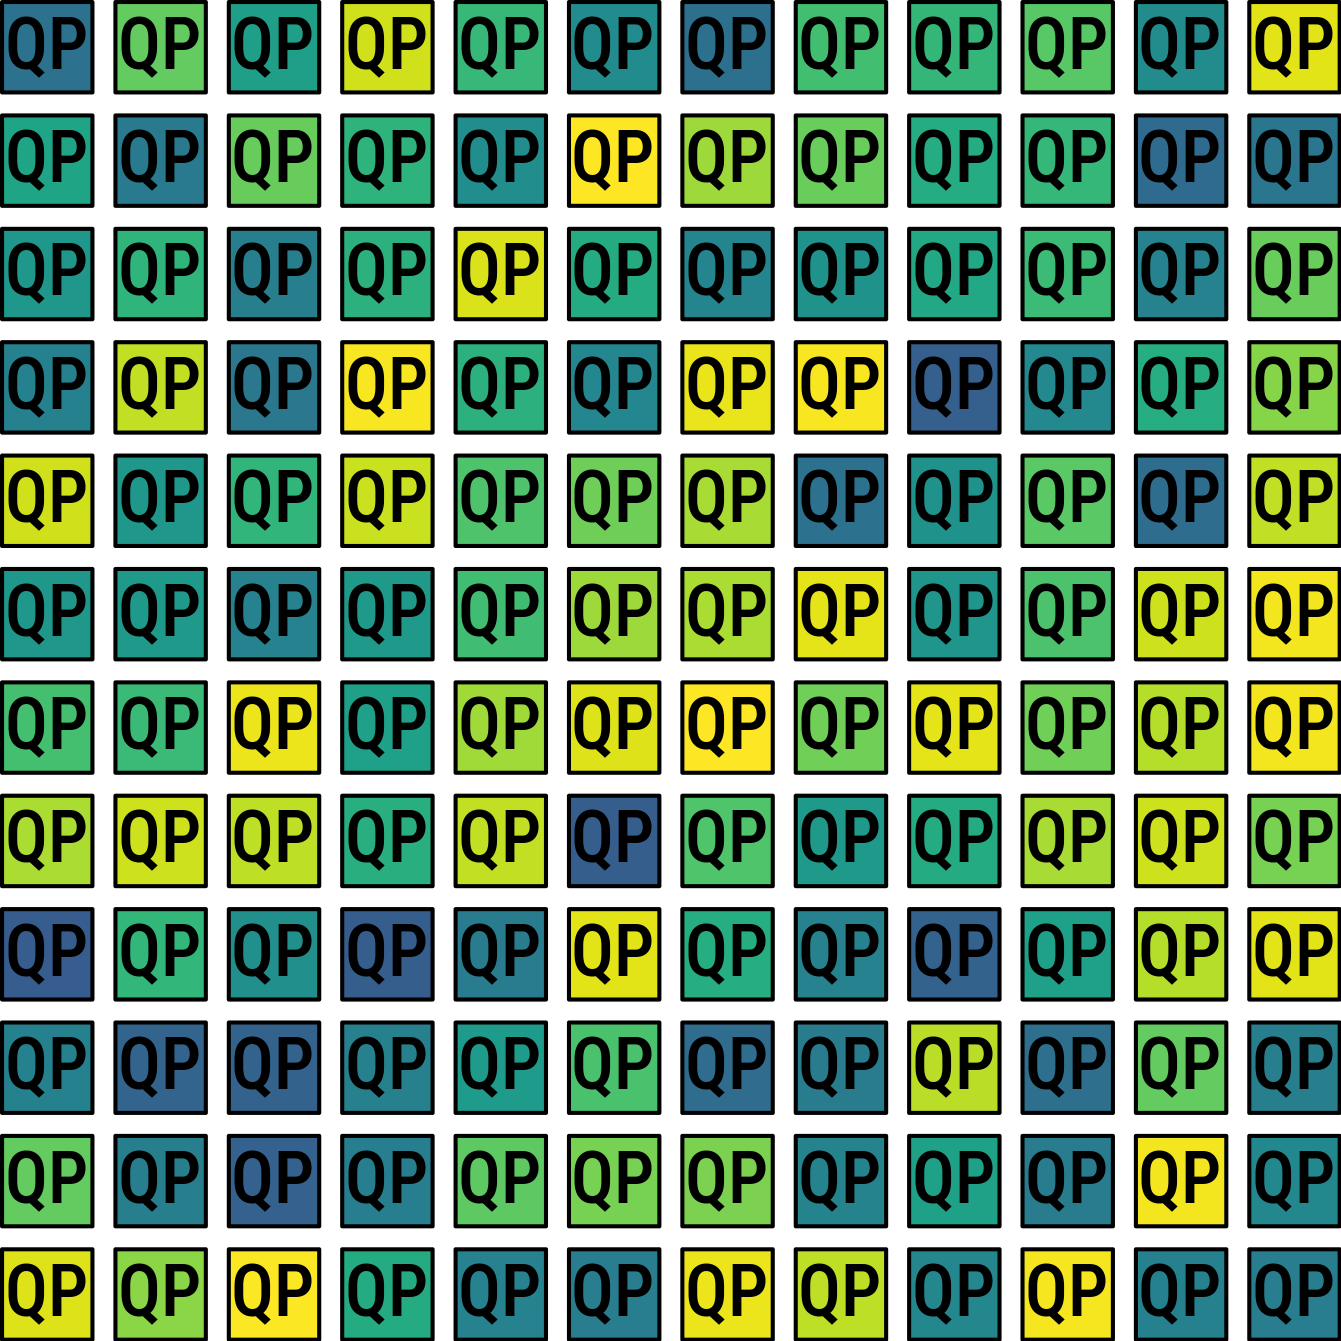

In [99]:
in_io = io.BytesIO(Path("new_logo.svg").read_bytes())
out_io = io.BytesIO()
cairosvg.svg2png(file_obj=in_io, write_to=out_io)
out_io.seek(0)
img = Image.open(out_io)
bg = Image.new("RGB", img.size, (255, 255, 255))
bg.paste(img, (0, 0), img)
bg